# Temporal-Difference Learning

*Temporal-Difference* Learning is both central and novel to reinforcement learning. TD is a combination of Dynamic programming (DP) and Monte Carlo ideas. Like DP, Temporal-Difference learns from raw experience without a model of the environments dynamics, and like DP, it uses past estimates to form new estimates (bootstrapping). This relationship between DP, TD and Monte Carlo methods is a running theme in the theory of reinforcement learning. 

## 6.1 TD Prediction

Like Monte Carlo, TD methods use experience to solve the prediction problem. Given some trajectories following a policy $\pi$, both methods update their estimates V for every non-terminal $S_t$ $v_{\pi}$ encountered.

Monte carlo, roughly speaking, waits until the return following the visit is known, then uses that return as the target for $V(S_t)$. Our simple every-visit Monte Calro method for nonstaionary environments is:

$$
V(S_t)\leftarrow V(S_t)+\alpha[G_t-V(S_t)]
$$

We call this method *constant-$\alpha$* MC, as it uses a constant step-size parameter $\alpha$. TD differs from this method, as in Monte Carlo, our $G_t$ is the actual return following time *t*, which requires us to wait until the end of an episode, TD differs as we only need to wait until the next time step. At time t+1, these methods immediately form a target and then make a useful update using the actual reward $R_{t+1}$, and the past estimate for $V(S_{t+1})$. The simplest TD method makes the update via:

$$
V(S_t)\leftarrow V(S_t)+\alpha [R_{t+1}+\gamma V(S_{t+1}-V(S_t))]
$$

This is done immediately on transition to state $S_{t+1}$ and receiving $R_{t+1}$. Essentially, our target for Monte Carlo updates is $G_t$, and our target for TD is $R_{t+1}+\gamma V(S_{t+1})$. This method is known as TD(0), or *one-step* TD. This is because it's a special case of TD($\lambda$) and n-step TD methods are later developed. 

It's interesting to note that $G_t$ and $R_{t+1}+\gamma V(S_{t+1})$ are mathematically the same. But in practice it's different because in Monte Carlo, $G_t$ is derived from the actual value, while in TD, we seperate it so we can use our past estimates for the subsequent state value.

Here we have TD(0) completely in procedural form:

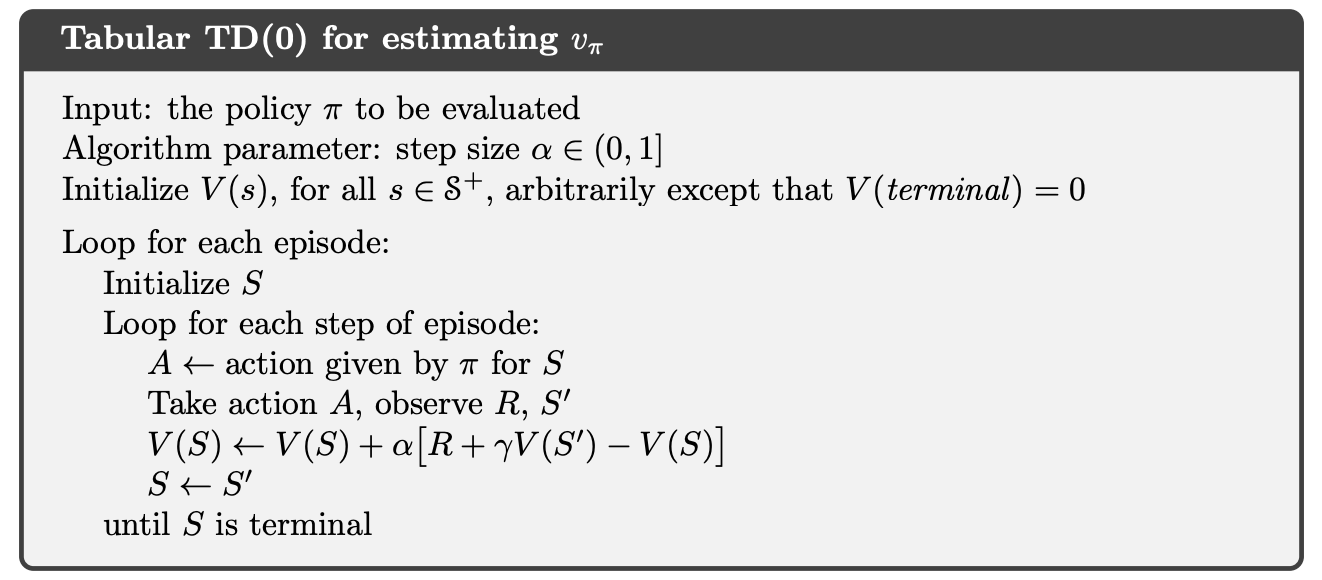

Since TD(0) bases it's updates in part on our past estimates, we can say that it's a bootstrapping method like in DP. From chapter 3 we know:

$$
v_{\pi}(s)\doteq\mathbb{E}_{\pi}[G_t|S_t=s] \ (6.3)
\\
=\mathbb{E}_{\pi}[R_{t+1}+\gamma G_{t+1}|S_t=s] \ (\text{From} (3.9))
\\
=\mathbb{E}_{\pi}[R_{t+1}+\gamma v_{\pi}(S_{t+1})|S_t=s] \ (6.4)
$$

Roughly speaking, Monte Carlo methods use 6.3 as the target, and DP uses 6.4 as a target, both of which are estimates. The monte carlo method is an estimate because we use a sample return in place of the actual expected return. The DP target is also an estimate, because we don't know the true value of $v_{\pi}(S_{t+1})$, and our current estimate $V(S_{t+1})$ is used. 

TD combines both of these estimates, because it samples the expected values from 6.4 and it uses the current estimate V in place of $v_{\pi}$. So in esence, TD combines the sampling of Monte Carlo with the bootstrapping of dynamic programming. With great care and imagination we can obtain the advantages of both Monte Carlo and DP methods.

We can visualise what is happening with our updates in TD(0) using a backup diagram:

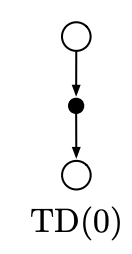

Where the value of the state node at the top of the diagram is updated based on the sample transition immediately following it below. We refer to the kind of updates done in TD and Monte Carlo as samples updates because they involve looking ahead to a sample successor state (or action-pair), then using that value of the successor and the reward along the way to compute our backed-up value, then updating the value of the original state using that. It might be a little confusing how this is the case for Monte Carlo methods because we only use the expected reward, but I'm assuming this is the case because we still use the successive, discounted, expected reward to calculate our current. 

These sample udpates differ from expected updates from Dp methods, due to them being based on a single successive sample, rather than the complete distribution of all possible successors like in DP.

An important note is that the quantity in the TD(0) update is a sort of error. It measures the differences between our current estimated value of $S_t$ and the better estimate from $R_{t+1}+\gamma V(S_{t+1})$. This quantity is known as the *TD error* and it arises in many forms throughout reinforcement learning:

$\delta_t \doteq R_{t+1}+\gamma V(S_{t+1})-V(S_t)$

The TD error describes the error in the estimate at time t+1, because our reward is not available until time t+1. It can also be said that if array V doesn't change during the episode (like in Monte Carl methods), then the Monte Carlo error can be written as a sum of TD errors:


$$
G_t-V(S_t)=R_{t+1}+\gamma G_{t+1}-V(S_t)+\gamma V(S_{t+1})-\gamma V(S_{t+1})
\\
=\delta_t + \gamma (G_{t=1}-V(S_{t+1}))
\\
=\delta_t+\gamma\delta_{t+1}\gamma^2(G_{t+2}-V(S_{t+2}))
\\
=\delta_t+\gamma \delta_{t+1}+\gamma^2\delta_{t+2}+...+\gamma^{T-t-1}\delta_{T-1}+\gamma^{T-t}(G_t-V(S_T))
\\
=\delta_t+\gamma \delta_{t+1}+\gamma^2\delta_{t+2}+....+\gamma^{T-t-1}\delta_{T-1}+\gamma^{T-t}(0-0)
\\
=\sum^{T-1}_{k=t}\gamma^{k-t}\delta_k
$$


This identity is not exact if V is updated during an episode, like in TD(0), but if the step size is small then it's approximatately this. This identity is an important part of the theory and algorithims of temporal difference learning. 

Exercise 6.1

If V changes during the episode then $G_t \approx R_{t+1} +\gamma V(S_{t+1})$ because $v(S_{t+1})\approx V(S_{t+1})$

There would be some difference between true $V_t(S_{t+1})$ and our approximate $V_t(S_{t+1})$

Could it be we need to add the sum of these differences back into our error? Like so

$$
G_t-V(S_t)=(\sum^{T-1}_{k=t}v_{\pi}-V_{\pi})+(\sum^{T-1}_{k=t}\gamma^{k-t}\delta_k)
$$


$$
G_t=R_{t+1}+\gamma G_{t+1}

\\

G_t - V_t(S_t) = R_{t+1}+\gamma G_{t+1} - V_t(S_t)

\\

G_t - V_t(S_t) = R_{t+1}+\gamma V_t(S_{t+1})-V_t(S_t)+\gamma (G_{t+1}-V_t(S_{t+1}))

$$
After chatgpting it, I'm on the right track, we'd need to add the sum of the differences between our state value at time t and time t+1.

Keep in mind this is only important thereotically, in practice we don't add these differences back.




Exercise 6.2

It seems like TD updates give better estimates for most scenarios. I think this because they give more regular updates than monte carlo methods. It'd be especially helpful when there's long episodes. For example it might not be as useful in blackjack because the episodes are fairly short, so we get many estimates for monte carlo methods quickly.  

In the example given, TD would be helpful as we would already have good estimates for the home to highway stint, which would speed up convergence compared to monte carlo methods which would treat each state seperately, and wouldn't take advantage of our previous knowledge.

A new example would be a maze. Let's say we've mapped a maze using whatever method, say TD. If we were to change the final 25% of the maze, TD would likely better perform here as it uses that first 75% in the form of the prior state values. This will make getting that last 25% much quicker. If it were monte carlo, we'd have to find that last 25% from scratch.

Essentially, TD has a "memory" of the environment whereas Monte carlo doesn't. This helps when parts of the environment have been changed as we still have that memory of the unchanged parts. Also, convergence in TD is likely much faster because we update much more frequently. 

## 6.2 Advantages of TD Prediction Methods

TD methods, like dynamic programming methods, boostrap. This means they learn a guess, from a previous guess. Is this a good thing? Why might it be better here than in DP and Monte Carlo, answering this will take the rest of the book (and more). But we'll briefly look at why that might be the case.

The first obvious advantage is that TD does not require a model of the environment. A model here refers to the reward and next-state probability distributions. We use a model directly in DP.

Our obvious advantage over Monte Carlo is that TD is an online, incremental method. It doesn't need to wait until the end of an episode, only one time step. This is critical in some situations, such as applications with very long episodes, or even continuing tasks with no end. Also, for some monte carlo methods, specifically some off-policy methods, monte carlo ignores or discounts episodes in which experimental actions are taken which greatly slows learning (For example in off-policy where we need to stop going through an episode where the probability of taking an action for our target policy is 0).

But can we be confident that TD methods converge to the true state-values like Monte Carlo? Yes, it's been proven that for any fixed policy $\pi$, TD(0) will converge to $v_{\pi}$  as the expectation approaches the limit, given a sufficiently small constant step-size parameter according to our usual stoachstic approximation conditions. 

Given that both TD and Monte Carlo methods will converge given enough episodes, then naturally we want to find out which will do it first, or be more efficient given limited data. Mathemtically this is an open question, in fact we don't even know how to formally phrase the question. But in practice, TD methods seem to be faster than constant-a MC methods for stoachstic tasks.



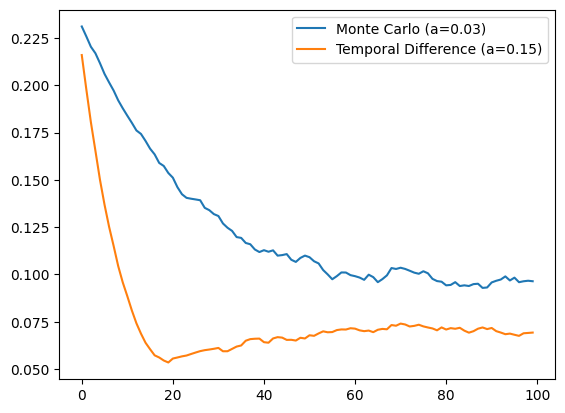

In [221]:
# Example 6.2 Random Walk
import random
import numpy as np
import matplotlib.pyplot as plt

TRUE_STATE_VALUES = np.array([1/6, 2/6, 3/6, 4/6, 5/6])
INITIAL_STATE_VALUES = 3/6

def random_walk() -> tuple[list, int]:
    walk = ["T_left", "A", "B", "C", "D", "E", "T_right"]
    curr = 3 # Start at C
    reward = 0
    trajectory = [walk[curr]]

    while walk[curr][0] != "T":
        if random.random() < 0.5: # Left
            curr = curr-1
        else:
            curr = curr+1# Right
        trajectory.append(walk[curr])
   
    if walk[curr] == "T_right":
        reward = 1

    return (trajectory, reward)

def rmse(arr_one, arr_two):
    return np.sqrt(np.mean((arr_one-arr_two)**2))

def monte_carlo_prediction(alpha: float, episodes: int) -> np.array:
    state_values = np.zeros(5, np.float64) + INITIAL_STATE_VALUES
    index_map = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4}
    rmse_hist = []

    for _ in range(episodes):
        trajectory, reward = random_walk()

        for timestep in trajectory[-2::-1]: # Reverse and start at second element in the reversed list
            idx = index_map[timestep]
            state_values[idx] = state_values[idx] + (alpha * (reward - state_values[idx]))

        rmse_hist.append(rmse(TRUE_STATE_VALUES, state_values))

    return state_values, rmse_hist

def temporal_difference_prediction(alpha: float, episodes: int) -> np.array:
    state_values = np.zeros(5, np.float64) + INITIAL_STATE_VALUES
    index_map = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4}
    rmse_hist = []

    for _ in range(episodes):
        trajectory, reward = random_walk()

        for timestep_idx in range(len(trajectory)-1):
            state = trajectory[timestep_idx]
            subsequent_state = trajectory[timestep_idx+1]
            state_idx = index_map[state]

            if timestep_idx == len(trajectory)-2: # If at second last state (last non-terminal state)
                state_values[state_idx] += alpha * (reward - state_values[state_idx])
            else:
                ss_idx = index_map[subsequent_state]
                state_values[state_idx] += alpha * (state_values[ss_idx]-state_values[state_idx])

        rmse_hist.append(rmse(TRUE_STATE_VALUES, state_values))

    return state_values, rmse_hist


mc_alpha = 0.03
td_alpha = 0.15
episodes = 100
all_mc_rmse_lists = []
all_td_rmse_lists = []

for i in range(200):
    _, mc_rmse_hist = monte_carlo_prediction(mc_alpha, episodes)
    all_mc_rmse_lists.append(mc_rmse_hist)

for i in range(200):
    _, td_rmse_hist = temporal_difference_prediction(td_alpha, episodes)
    all_td_rmse_lists.append(td_rmse_hist)

avg_mc_rmse = np.array(all_mc_rmse_lists).mean(axis=0)
avg_td_rmse = np.array(all_td_rmse_lists).mean(axis=0)

plt.plot(avg_mc_rmse, label=f"Monte Carlo (a={mc_alpha})")
plt.plot(avg_td_rmse, label=f"Temporal Difference (a={td_alpha})")
plt.legend()

# TD tends to do better at a relatively high Alpha compared to MC
# TD converges much faster than MC
# At very low alphas (0.006 for both), MC actually. converges better


Exercise 6.3

This question is asking about why only V(A) changed on the first run of TD(0). It's important to note here that all state values begin as 0.5. So for the first transition, let's assume it goes C->B, making the update be V(C) = V(C) + 0.1 * (0 + V(B) - V(C)), so 
$$
V(C) = 0.5 + 0.1 * (0 + 0.5 - 0.5) = 0.5 + 0.1 * 0 = 0.5
$$
So of course this first update won't change it as the TD error ($\delta$)is 0.
This would be the same for all non-terminal states as all state-values and rewards are 0 for these non-terminal transitions. However if we were in V(A) going to the left terminal state, the update would be: V(A) = V(A) + alpha * (0 + V(left terminal) - V(A))
so
$$
V(A) = 0.5 + 0.1 * (0 + 0 - 0.5) = 0.5 + 0.1 * -0.5 = 0.5 - 0.05 = 0.45
$$
This leaves us with V(A) being 0.05 less than before. As this is what we can see in Example 6.2, this tells us that the first random walk ended on the left terminal state.

So overall, we can tell the first random walk ended on the left terminal state due to V(A) decreasing by 0.05. We can also tell that only this one changed as all other transitions led to updated with a TD error of 0, leaving to no other state value being changed.


Exercise 6.4

Yes the results are significantly different if different step-size parameters, although the conclusion that TD converges faster does appear to be a sound conclusion for most step-size values.

The two algorithms tend to benefit from different ranges of step-size parameters. For example, monte carlo benefits from a much smaller alpha value, seeming to perform best at about 0.01-0.03. This is in stark contrast from TD, which benefits from a higher TD, at about 0.05-0.15.

So for the first part of this question, I don't think the conclusions are different, with each algorithms respective best step-size parameter, TD(0) does appear to converge much faster.

As for the second part of the question, this doesn't seem to be the best case. For TD, the best value for alpha appears to be 0.05, but for MC, this is too high and leads to a worse convergences. And for MC, the best value seems to be 0.03. Meeting in the middle here at 0.04 does show some interesting results. TD seems to get better performance than previous values, getting to values between 0.025  and 0.05, however MC performs worse at this value. So no there doesn't seem to be a value that both algorithms perform better at. 

Exercise 6.5

From a first glance, it does appear to be related to the inital starting values. Setting it to a higher value, like 1, or a lower value, like 0, appears to get rid of this pattern. Maybe this occurs as it's a good "middle point" of the true state values. For example, the true value state for V(C) is literally 0.5 and all the other true values are relatively close to that. So what might be happening is that it initially decreases quickly as it's already close to the true values but then increases as it moves away from the initial state values.

Exercise 6.6

One obvious way would be by using dynamic programming. We know the distributions of the transitions and rewards exactly. Then we could iteratively get the answers through dynamic programming methods.

Alternatively, and what I think was used, was solving the problem by formulating it as a system of linear equations, which was breifly gone over in the early chapters. I think this is what was used because the environment is tiny, and perfect for something like using the bellman systems of linear equations.



## 6.3 Optimality of TD(0)

Let's say we only have a limited amount of experience to learn from, like 100 timesteps or 50 episodes. In thiese sorts of cases, a common approach with incremental learning methods is to show this experience repeatedly until our method converges to an answer.

Given our approximate value function, V, our updates specified are earlier are computed for each time step t for which we don't visit a terminal state. But we only update the value functions once and it's updated by the sum of our computed increments. We then process all of our available experience again with our new value function to get a new overall increment, and we keep repeating this until the the value functions converge. This is known as *batch updating* because updates are only made after processing a *batch* of training data.

Using batch updating, TD(0) will converge deterministically to a single answer, independant of the step-size parameter alpha, as long as alpha is sufficiently small. Constant-a MC method also converges determinstically under the same conditions, but to a different answer. Understanding that these two methods come up with different answers helps us understand the difference between the two. With normal updating, the methods don't move all the way to their respective batch answers, but they take steps towards them. 


### Example 6.3: Random Walk Under Batch Updating
To better understand why the two methods come up with different answers under batch training, it might help to be motivated by an example.

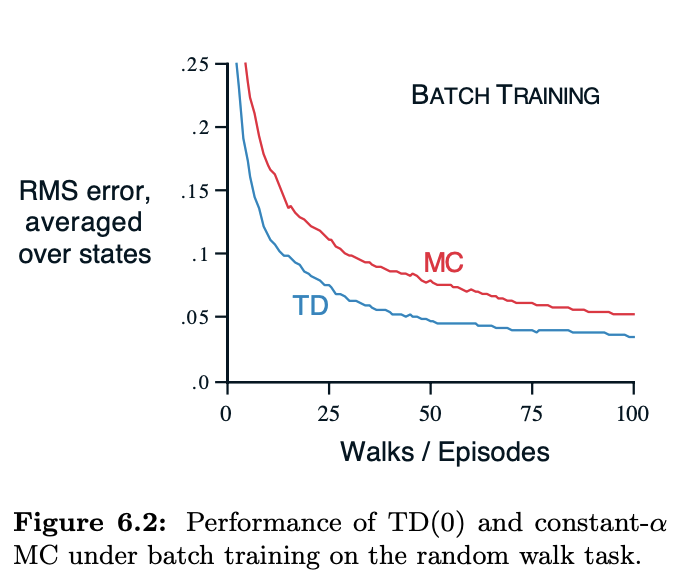

In this example, batch updating was applied to the random walks example from above using constant-$\alpha$ and TD(0). After each new episode, all previous episodes were treated as a batch. These were then shown to both methods until the value functions converged with a sufficiently small $\alpha$. These were then compared to the true value function, $v_{\pi}$, and the average root mean-squared error across the five states was plotted to give figure 6.2. We note that TD consistently outperforms MC.

Under batch training, constant-$\alpha$ MC converges to approximate values, V(s), that are sample averages of the actual returns experienced after visiting each state s. These are optimal in the sense that minimise the error from the actual returns in the training set. So it's surprising that TD was actually able to out perform according to our error metric shown in the figure. Why this is, is because MC is optimal only in a limited way, while TD is optimal in a way that's more relevant to predicting returns.



### Example 6.4: You are the predictor

This example will further highlight how the two methods approach learning. 

We palce ourselves in the role of the predictor of returns for an unknown Markov reward process. We observe these eight episodes:

1. A, 0, B, 0
2. B, 1
3. B, 1
4. B, 1
5. B, 1
6. B, 1
7. B, 1
8. B, 0

Given this batch of data, what would we say are the optimal predictions, i.e., the best values for V(A) and V(B)? V(B) is fairly simple, it would clearly be 3/4 as we see a returns of 1 6 out of 8 times. 
But the state-value for V(A) is a bite more tricky. There are two reasonable answers. One way is to observe that A always transitions to B, which gave a result of 3/4, so therefore V(A) should also be 3/4. A way of getting the answer this way is to model the Markov process like so:

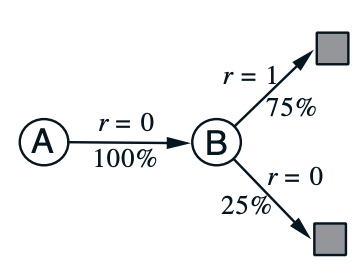

Computing it this way does give us V(A)=3/4. This is the answer that batch TD(0) gives.

But we also have another reasonable answer. We simply observe that we see A once and the return was 0, so therefore V(A) should be 0. This is the answer that batch monte carlo gives. We also notice that this is the answer that would give us the minimum squared error on the training data. In fact, it gives zero error on this set of training data. But of course, we still expect the first answer to be better. This is because if the process is Markov, we expect it would give a lower error on future data, even though the monte carlo answer is better on our existing data.


Example 6.4 shows us the general difference between the estimates found by batch TD(0) and batch MC methods. Batch MC finds us the estimate that minimises mean-squared error on the training set. Batch TD(0) find the estimates that would be exactly correct for the maximum-likelihood model of the Markov process. In general, the *maximum-likelihood estimate* of a parameter is the parameter value which probability of generating the data is greatest. So TD essentially automatically generates the model of the Markov process in the most obvious way from the observed episodes. That is it comes up with the estimated transition probabilities from i to j and the associated expected reward is the average of the rewards observed over those transitions. Given this model, we can compute the approximate value-functions for if the model were exactly correct. This is called the *certainty-equivalence estimate* because it's equivalent to assuming that the estimate of the underlying process was known rather than an estimate. In general TD(0) converges to this certainty-equivalence estimate. 

This observation can help explain why TD methods converge faster than Monte Carlo methods. In batch form, TD(0) is faster than MC because it computse the true certainty-equivalence estimate. Although the nonbatch methods don't acihieve either the certainty-equivalence or the minimum squared-error estimates, they can be understood as moving in these directions. So nonbatch TD(0) may be faster than constant-$\alpha$ MC as it's moving toward a better estimate. 

Although the certainty-equivalence estimate is in some sense an optimal solution, it's almost never feasible to compute it directly.

Exercise 6.7

This should be fairly simple, I'm guessing it would be:

$$
V(S) = V(S) + \alpha [\rho_{t:t} (R_{t+1} + V(S_{t+1}) - V(S))]
$$

Where
$$
\rho_{t:t} = \frac{\pi(A_t|S_t)}{b(A_t|S_t)}
$$

After chatgpting it, this is pretty much correct, there's just no reason for the importance samplign ratio to be within the square brackets, it can just me multiplied alongside alpha. 

Going to try something a bit different with my note-taking. Instead of essentially copying the textbook, just going to write short, hopefully impactful, notes.
## 6.4 Sarsa: On-policy TD Control

- TD is another form of generalised policy iteration. 
- TD has on and off policy methods.
- Sarsa is on-policy

- Sarsa learns Q-values rather than State-values. Necessary as we don't have a model. 

Our update rule is pretty much the same as before, except with Q values:
$$
Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha[R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)]
$$

- If $Q(S_{t+1}, A_{t+1})$ is terminal, then it's set to 0. 

- Sarsa gets its name from the quintuple of events $(S_t,A_t,R_{t+1},S_{t+1},A_{t+1})$.
- Control in this algorithm is much like other on-policy methods, we continually change $\pi$ greedily towards the highest q values. We do need to use $\epsilon$-greedy or $\epsilon$-oft to keep exploration going. 

- We can ensure convergences by making sure each state-action pair is visited an infinte number of times and ensuring the policy becomes greedy, which can be done by setting $\epsilon = 1/t$.



Exercise 6.8

(1) So we want to prove that:
$$
G_t - Q(S_t, A_t) = \sum^{T-1}_{k=t}\gamma^{k-t}\delta_k
$$

(2) First I'll just steal the first line:
$$
G_t - Q(S_t,A_t) = R_{t+1} + \gamma G_{t+1} - Q(S_t, A_t) + \gamma Q(S_{t+1}, A_{t+1}) - \gamma Q(S_{t+1}, A_{t+1})
$$

(3) And we can assume that TD error for action values is:
$$
\delta_t=R_{t+1}+\gamma Q(S_{t+1}, A_{t+1})-Q(S_t,A_t)
$$

Now we rearrange (2) using (3) to get (4):

$$
G_t - Q(S_t,A_t) = \delta_t + \gamma(G_{t+1} - Q(S_{t+1}, A_{t+1}))
$$

(5) Now we expand (4) using our return formula and the trick from (2)
$$
G_t - Q(S_t,A_t) = \delta_t + \gamma(R_{t+2} + \gamma G_{t+2} - Q(S_{t+1}, A_{t+1}) + \gamma Q(S_{t+2}, A_{t+2}) - \gamma Q(S_{t+2}, A_{t+2}))
$$

(6) And now rearrange again to get our second TD error
$$
G_t - Q(S_t,A_t) = \delta_t + \gamma(\delta_{t+1} + \gamma(G_{t+2}-Q(S_{t+2}, A_{t+2})))
$$

Then we just repeat this process until we're at T-1

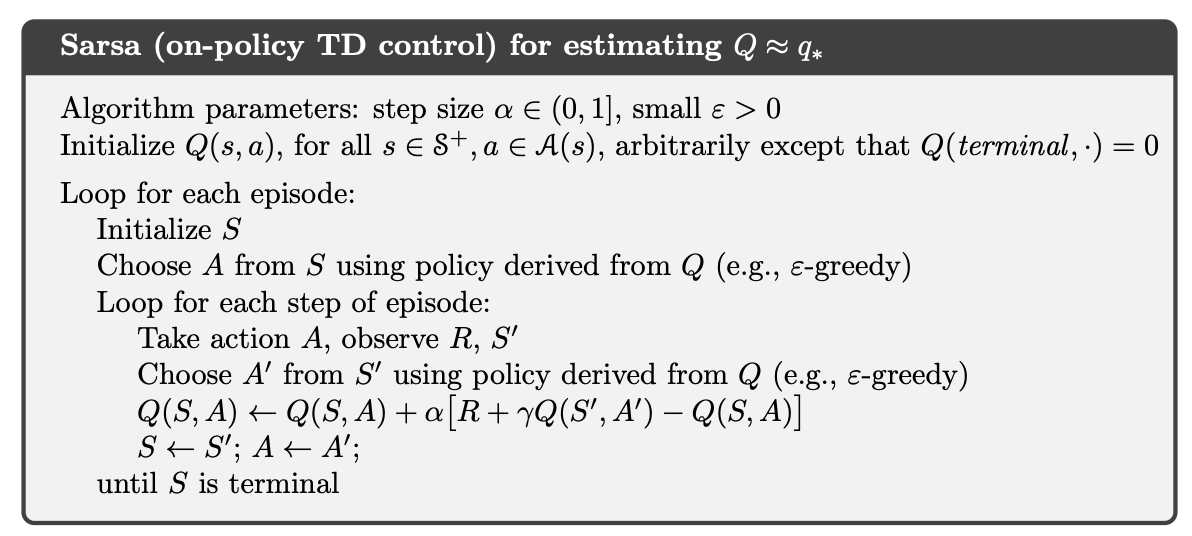

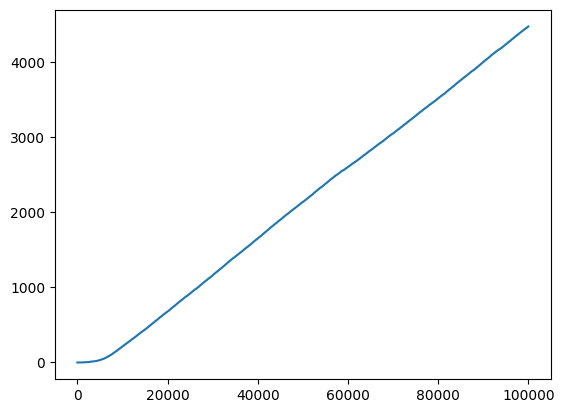

In [299]:
# Example 6.5: Windy Gridworld
import numpy as np

class WindyGridworld:
    def __init__(self):
        self.x_lim, self.y_lim = 7, 10
        self.wind = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
        self.wind_velocities = np.array([[-x, 0] for x in self.wind])
        self.start = np.array([3, 0])
        self.end = np.array([3, 7])
        self.pos = self.start.copy()
        self.actions = np.array([[0, -1], [-1, 0], [0, 1], [1, 0]], dtype=np.int16)

    def step(self, action_idx: int):
        action = self.actions[action_idx][0]
        self.pos += action # Apply action

        if self.pos[1] >= 10:
            self.pos[1] = 9
        elif self.pos[1] < 0:
            self.pos[1] = 0
        self.pos += self.wind_velocities[self.pos[1]] # Apply wind

        # Check if it's within bounds
        # Check x
        if self.pos[0] < 0:
            self.pos[0] = 0
        if self.pos[0] >= self.x_lim:
            self.pos[0] = self.x_lim-1
        # Check y
        if self.pos[1] < 0:
            self.pos[1] = 0
        if self.pos[1] >= self.y_lim:
            self.pos[1] = self.y_lim-1
    
    def reset(self):
        self.pos = self.start.copy()
    
policy = np.zeros((7, 10, 4), dtype=np.float64) + 1/4 # 7 rows, 10 columns, 4 actions
epsilon = 0.1
alpha = 0.5
step_reward = -1
gamma = 1.0

def update_policy(policy: np.array, q_values: np.array, epsilon) -> np.array:
    best_action = np.argmax(q_values)
    policy[:] = 0
    policy[best_action] = 1-epsilon
    policy += epsilon/4


def sarsa(policy: np.array, epsilon: float, alpha: float, step_reward: int, gamma: float, time_steps: int) -> np.array:
    q_values = np.zeros((7, 10 , 4), dtype=np.float64) # 7 rows, 10 columns, 4 actions
    gridworld = WindyGridworld()
    action_idxs = np.array([0, 1, 2, 3])
    i = 0
    episodes = 0
    episode_hist = []
    i_hist = []

    while i < time_steps:
        pos = gridworld.pos
        episode_done = False

        action_dist = policy[pos[0], pos[1]] # Get action distribution from policy
        action = np.random.choice(action_idxs, 1, p=action_dist) # Pick action

        s_a = (pos[0], pos[1], action)
        while not episode_done:
            gridworld.step(action)
            pos = gridworld.pos
            i += 1

            i_hist.append(i)
            episode_hist.append(episodes)

            if (pos==gridworld.end).all(): # Finished
                episode_done = True 
                episodes += 1

            next_action_dist = policy[pos[0], pos[1]] # Get action distribution from policy
            next_action = np.random.choice(action_idxs, 1, p=next_action_dist) # Pick action
            n_s_a = (pos[0], pos[1], next_action)

            q_values[*s_a] += alpha * ((step_reward + gamma * q_values[*n_s_a])- q_values[*s_a])

            update_policy(policy[*s_a[:-1]], q_values[*s_a[:-1]], epsilon)
 
            s_a = n_s_a
            action = next_action

        gridworld.reset()
    
    return episode_hist, i_hist


ep_hist, ts_hist = sarsa(policy, epsilon, alpha, -1, gamma, 100_000)

plt.plot(ts_hist, ep_hist)



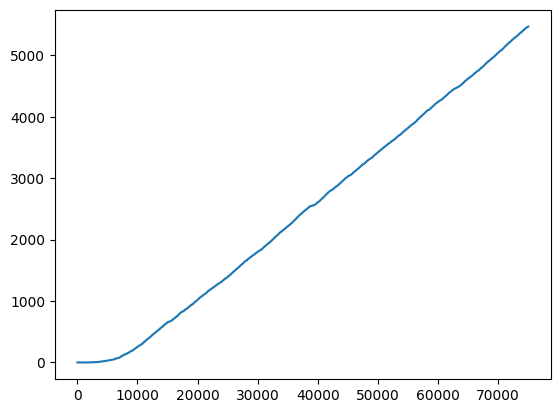

In [297]:
# Example 6.5: Windy Gridworld with King's Moves
import numpy as np

class WindyGridworld:
    def __init__(self):
        self.x_lim, self.y_lim = 7, 10
        self.wind = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
        self.wind_velocities = np.array([[-x, 0] for x in self.wind])
        self.start = np.array([3, 0])
        self.end = np.array([3, 7])
        self.pos = self.start.copy()
        self.actions = np.array([[0, -1], [-1, -1], [-1, 0], [-1, 1], [0, 1], [1, 1], [1, 0], [1, -1]], dtype=np.int16) # 8 moves

    def step(self, action_idx: int):
        action = self.actions[action_idx][0]
        self.pos += action # Apply action

        if self.pos[1] >= 10:
            self.pos[1] = 9
        elif self.pos[1] < 0:
            self.pos[1] = 0
        self.pos += self.wind_velocities[self.pos[1]] # Apply wind

        # Check if it's within bounds
        # Check x
        if self.pos[0] < 0:
            self.pos[0] = 0
        if self.pos[0] >= self.x_lim:
            self.pos[0] = self.x_lim-1
        # Check y
        if self.pos[1] < 0:
            self.pos[1] = 0
        if self.pos[1] >= self.y_lim:
            self.pos[1] = self.y_lim-1
    
    def reset(self):
        self.pos = self.start.copy()
    
policy = np.zeros((7, 10, 8), dtype=np.float64) + 1/8 # 7 rows, 10 columns, 8 actions
epsilon = 0.1
alpha = 0.5
step_reward = -1
gamma = 1.0

def update_policy(policy: np.array, q_values: np.array, epsilon) -> np.array:
    best_action = np.argmax(q_values)
    policy[:] = 0
    policy[best_action] = 1-epsilon
    policy += epsilon/8


def sarsa(policy: np.array, epsilon: float, alpha: float, step_reward: int, gamma: float, time_steps: int) -> np.array:
    q_values = np.zeros((7, 10 , 8), dtype=np.float64) # 7 rows, 10 columns, 4 actions
    gridworld = WindyGridworld()
    action_idxs = np.array([0, 1, 2, 3, 4, 5, 6, 7])
    i = 0
    episodes = 0
    episode_hist = []
    i_hist = []

    while i < time_steps:
        pos = gridworld.pos
        episode_done = False

        action_dist = policy[pos[0], pos[1]] # Get action distribution from policy
        action = np.random.choice(action_idxs, 1, p=action_dist) # Pick action

        s_a = (pos[0], pos[1], action)
        while not episode_done:
            gridworld.step(action)
            pos = gridworld.pos
            i += 1

            i_hist.append(i)
            episode_hist.append(episodes)

            if (pos==gridworld.end).all(): # Finished
                episode_done = True 
                episodes += 1

            next_action_dist = policy[pos[0], pos[1]] # Get action distribution from policy
            next_action = np.random.choice(action_idxs, 1, p=next_action_dist) # Pick action
            n_s_a = (pos[0], pos[1], next_action)

            q_values[*s_a] += alpha * ((step_reward + gamma * q_values[*n_s_a])- q_values[*s_a])

            update_policy(policy[*s_a[:-1]], q_values[*s_a[:-1]], epsilon)
 
            s_a = n_s_a
            action = next_action

        gridworld.reset()
    
    return episode_hist, i_hist


ep_hist, ts_hist = sarsa(policy, epsilon, alpha, -1, gamma, 75_000)

plt.plot(ts_hist, ep_hist)



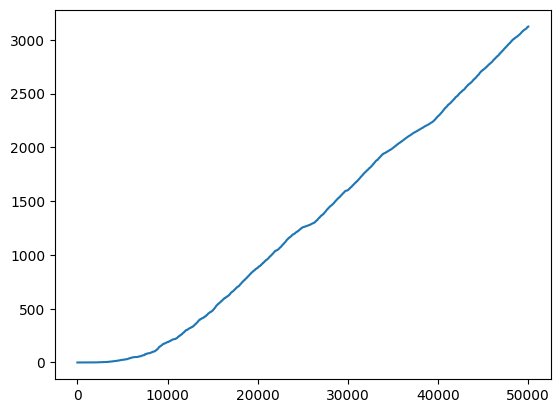

In [308]:
# Example 6.5: Windy Gridworld with King's Moves and "no move"
import numpy as np

class WindyGridworld:
    def __init__(self):
        self.x_lim, self.y_lim = 7, 10
        self.wind = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
        self.wind_velocities = np.array([[-x, 0] for x in self.wind])
        self.start = np.array([3, 0])
        self.end = np.array([3, 7])
        self.pos = self.start.copy()
        self.actions = np.array([[0, -1], [-1, -1], [-1, 0], [-1, 1], [0, 1], [1, 1], [1, 0], [1, -1], [0, 0]], dtype=np.int16) # 8 moves

    def step(self, action_idx: int):
        action = self.actions[action_idx][0]
        self.pos += action # Apply action

        if self.pos[1] >= 10:
            self.pos[1] = 9
        elif self.pos[1] < 0:
            self.pos[1] = 0
        self.pos += self.wind_velocities[self.pos[1]] # Apply wind

        # Check if it's within bounds
        # Check x
        if self.pos[0] < 0:
            self.pos[0] = 0
        if self.pos[0] >= self.x_lim:
            self.pos[0] = self.x_lim-1
        # Check y
        if self.pos[1] < 0:
            self.pos[1] = 0
        if self.pos[1] >= self.y_lim:
            self.pos[1] = self.y_lim-1
    
    def reset(self):
        self.pos = self.start.copy()
    
ACTIONS = 9
policy = np.zeros((7, 10, ACTIONS), dtype=np.float64) + 1/9 # 7 rows, 10 columns, 8 actions
epsilon = 0.1
alpha = 0.5
step_reward = -1
gamma = 1.0

def update_policy(policy: np.array, q_values: np.array, epsilon) -> np.array:
    best_action = np.argmax(q_values)
    policy[:] = 0
    policy[best_action] = 1-epsilon
    policy += epsilon/ACTIONS


def sarsa(policy: np.array, epsilon: float, alpha: float, step_reward: int, gamma: float, time_steps: int) -> np.array:
    q_values = np.zeros((7, 10 , ACTIONS), dtype=np.float64) # 7 rows, 10 columns, 4 actions
    gridworld = WindyGridworld()
    action_idxs = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
    i = 0
    episodes = 0
    episode_hist = []
    i_hist = []

    while i < time_steps:
        pos = gridworld.pos
        episode_done = False

        action_dist = policy[pos[0], pos[1]] # Get action distribution from policy
        action = np.random.choice(action_idxs, 1, p=action_dist) # Pick action

        s_a = (pos[0], pos[1], action)
        while not episode_done:
            gridworld.step(action)
            pos = gridworld.pos
            i += 1

            i_hist.append(i)
            episode_hist.append(episodes)

            if (pos==gridworld.end).all(): # Finished
                episode_done = True 
                episodes += 1

            next_action_dist = policy[pos[0], pos[1]] # Get action distribution from policy
            next_action = np.random.choice(action_idxs, 1, p=next_action_dist) # Pick action
            n_s_a = (pos[0], pos[1], next_action)

            q_values[*s_a] += alpha * ((step_reward + gamma * q_values[*n_s_a])- q_values[*s_a])

            update_policy(policy[*s_a[:-1]], q_values[*s_a[:-1]], epsilon)
 
            s_a = n_s_a
            action = next_action

        gridworld.reset()
    
    return episode_hist, i_hist


ep_hist, ts_hist = sarsa(policy, epsilon, alpha, -1, gamma, 50_000)

plt.plot(ts_hist, ep_hist)



Exercise 6.9 Conclusion

It seems like adding kings moves improves performance, but adding a no movement action doesn't seem to improve performance further

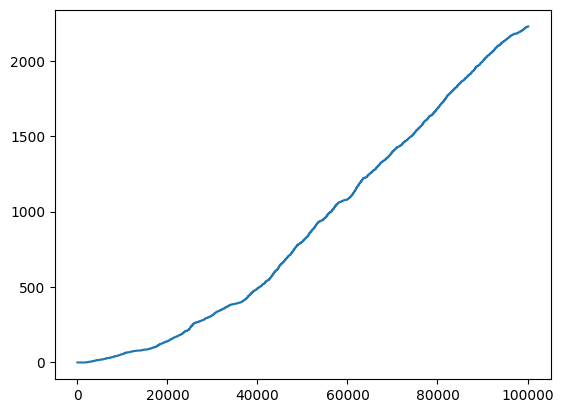

In [ ]:
# Exercise 6.10: Stoachstic Wind
import numpy as np
import random

class WindyGridworld:
    def __init__(self):
        self.x_lim, self.y_lim = 7, 10
        self.wind = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
        self.wind_velocities = np.array([[-x, 0] for x in self.wind])
        self.start = np.array([3, 0])
        self.end = np.array([3, 7])
        self.pos = self.start.copy()
        self.actions = np.array([[0, -1], [-1, -1], [-1, 0], [-1, 1], [0, 1], [1, 1], [1, 0], [1, -1]], dtype=np.int16) # 8 moves

    def step(self, action_idx: int):
        action = self.actions[action_idx][0]
        self.pos += action # Apply action

        if self.pos[1] >= 10:
            self.pos[1] = 9
        elif self.pos[1] < 0:
            self.pos[1] = 0
        
        # Apply wind
        wind_mean = self.wind[self.pos[1]]
        wind_rand = random.random()
        if wind_rand < 1/3:
            dy = wind_mean - 1
        elif wind_rand < 2/3:
            dy = wind_mean
        else:
            dy = wind_mean + 1

        self.pos += np.array([dy, 0]) # Apply wind

        # Check if it's within bounds
        # Check x
        if self.pos[0] < 0:
            self.pos[0] = 0
        if self.pos[0] >= self.x_lim:
            self.pos[0] = self.x_lim-1
        # Check y
        if self.pos[1] < 0:
            self.pos[1] = 0
        if self.pos[1] >= self.y_lim:
            self.pos[1] = self.y_lim-1
    
    def reset(self):
        self.pos = self.start.copy()
    
policy = np.zeros((7, 10, 8), dtype=np.float64) + 1/8 # 7 rows, 10 columns, 8 actions
epsilon = 0.1
alpha = 0.5
step_reward = -1
gamma = 1.0

def update_policy(policy: np.array, q_values: np.array, epsilon) -> np.array:
    best_action = np.argmax(q_values)
    policy[:] = 0
    policy[best_action] = 1-epsilon
    policy += epsilon/8


def sarsa(policy: np.array, epsilon: float, alpha: float, step_reward: int, gamma: float, time_steps: int) -> np.array:
    q_values = np.zeros((7, 10 , 8), dtype=np.float64) # 7 rows, 10 columns, 4 actions
    gridworld = WindyGridworld()
    action_idxs = np.array([0, 1, 2, 3, 4, 5, 6, 7])
    i = 0
    episodes = 0
    episode_hist = []
    i_hist = []

    while i < time_steps:
        pos = gridworld.pos
        episode_done = False

        action_dist = policy[pos[0], pos[1]] # Get action distribution from policy
        action = np.random.choice(action_idxs, 1, p=action_dist) # Pick action

        s_a = (pos[0], pos[1], action)
        while not episode_done:
            gridworld.step(action)
            pos = gridworld.pos
            i += 1

            i_hist.append(i)
            episode_hist.append(episodes)

            if (pos==gridworld.end).all(): # Finished
                episode_done = True 
                episodes += 1

            next_action_dist = policy[pos[0], pos[1]] # Get action distribution from policy
            next_action = np.random.choice(action_idxs, 1, p=next_action_dist) # Pick action
            n_s_a = (pos[0], pos[1], next_action)

            q_values[*s_a] += alpha * ((step_reward + gamma * q_values[*n_s_a])- q_values[*s_a])

            update_policy(policy[*s_a[:-1]], q_values[*s_a[:-1]], epsilon)
 
            s_a = n_s_a
            action = next_action

        gridworld.reset()
    
    return episode_hist, i_hist


ep_hist, ts_hist = sarsa(policy, epsilon, alpha, -1, gamma, 100_000)

plt.plot(ts_hist, ep_hist)
plt.show()


As expected, adding stochastic wind makes the problem much more difficult for the algorithms, although it does still appear to converge.

## 6.5: Q-learning: Off-policy TD Control

- Q-learning was an early breakthrough in reinforcement learning (Watkins, 1989)

It's very similar to Sarsa:
$$
Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha[R_{t+1}+\gamma \max_aQ(S_{t+1},a)-S(S_t, A_t)] 
$$
So instead of taking the subsequent action value, we take the max subsequent action value. 

- So Q (learned action value) directly approximates $q_*$, independant of the policy being followed. 

- Since we aren't updating based on our policy anymore, this method is off-policy.

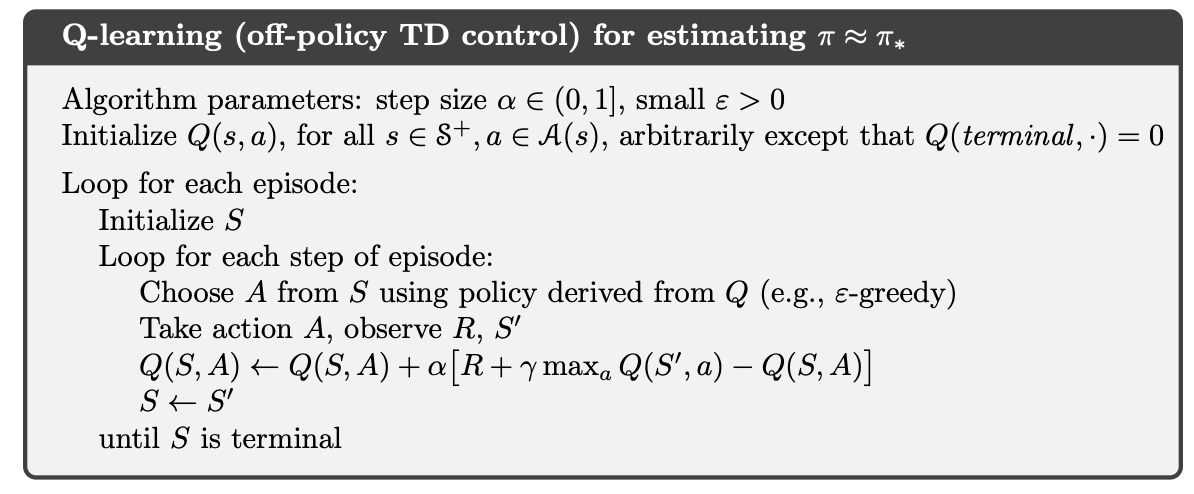


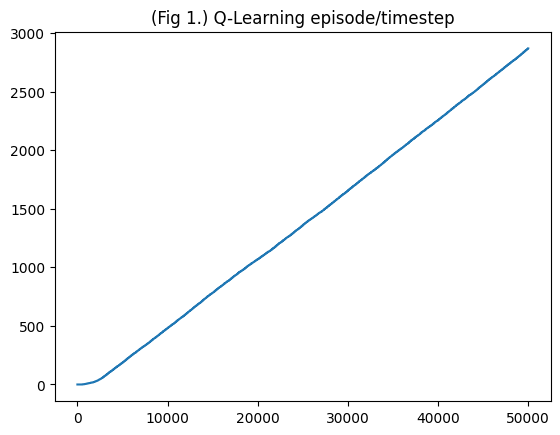

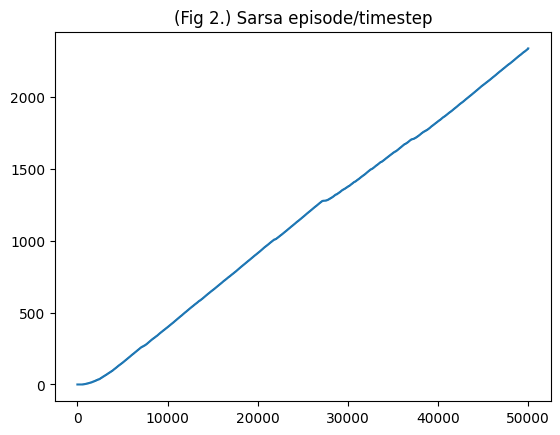

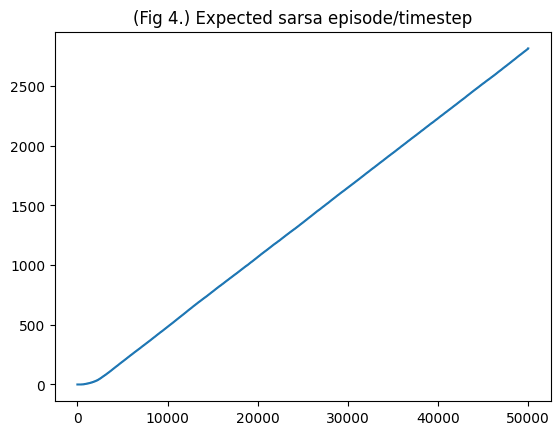

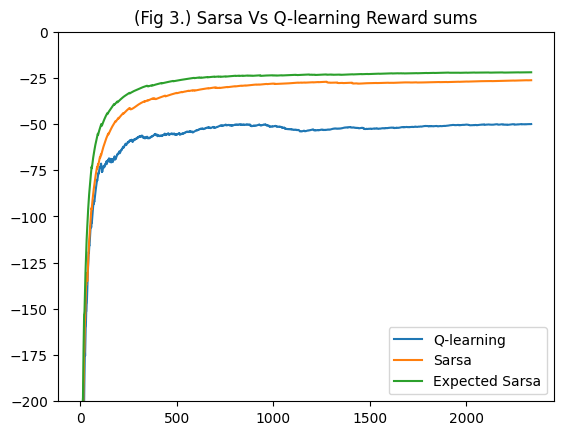

In [371]:
# Example 6.6: Cliff Walking
import numpy as np
import matplotlib.pyplot as plt

class CliffWalking:
    def __init__(self, x_lim: int, y_lim: int):
        self.grid = np.zeros((x_lim, y_lim), dtype=np.int8)
        self.x_lim, self.y_lim = x_lim, y_lim
        self.grid[-1, 1:-1] = -1
        self.start = np.array([x_lim-1, 0])
        self.pos = self.start.copy()
        self.goal = np.array([x_lim-1, y_lim-1])
        self.actions = np.array([[0, -1], [-1, 0], [0, 1], [1, 0]]) # Left, Up, Right, Down

    def step(self, action_idx: int):
        self.pos += self.actions[action_idx][0]

        # Check if in bounds
        if self.pos[0] < 0:
            self.pos[0] = 0
        if self.pos[0] >= self.x_lim:
            self.pos[0] = self.x_lim-1 
        if self.pos[1] < 0:
            self.pos[1] = 0
        if self.pos[1] >= self.y_lim:
            self.pos[1] = self.y_lim-1

    def reset(self):
        self.pos = self.start.copy()

    def check_state(self):
        if (self.pos==self.goal).all(): # Finished
            return 1 
        elif self.grid[*self.pos] == -1: # Check if on cliff
            self.reset()
            return -1
        else:
            return 0 # Continue

def update_policy(policy: np.array, q_values: np.array, epsilon: float, action_count: int):
    max_a = np.argmax(q_values)

    policy[:] = 0
    policy[max_a] = 1-epsilon
    policy[:] += epsilon/action_count

def cliff_walking_learning(env: CliffWalking, policy: np.array, epsilon: float, 
               alpha: float, gamma: float, max_timesteps: int,
               update_type: str):
    a_count = len(env.actions)
    q_values = np.zeros((env.x_lim, env.y_lim, a_count), dtype=np.float64)
    action_idxs = np.array([x for x in range(a_count)])
    ep_count = 0
    ep_count_hist = []
    timestep = 0
    timestep_hist = []
    r_sum_hist = []
    r_sum_avg_hist = []

    while timestep < max_timesteps:
        pos = env.pos.copy() # Get position
        end_state = 0
        r_sum = 0

        while end_state != 1:
            reward = -1
            a_dist = policy[*pos] # Get action distribution

            a_idx = np.random.choice(action_idxs, 1, p=a_dist) # Pick action

            env.step(a_idx)
            end_state = env.check_state()

            if end_state == 1:
                ep_count += 1
            
            if end_state == -1: # Check if at cliff
                reward = -100
            
            next_pos = env.pos.copy() # Get new state

            if update_type == "sarsa":
                next_a_idx = np.random.choice(action_idxs, 1, p=policy[*next_pos])
                q_values[*pos, a_idx] += alpha * (reward + gamma * q_values[*next_pos, next_a_idx] - q_values[*pos, a_idx]) # Update q value
            elif update_type == "q_learning":
                q_values[*pos, a_idx] += alpha * (reward + gamma * np.max(q_values[*next_pos]) - q_values[*pos, a_idx]) # Update q values
            else: # Expected sarsa
                expected_next_q_value = np.dot(policy[*next_pos], q_values[*next_pos])
                q_values[*pos, a_idx] += alpha * (reward + gamma * expected_next_q_value - q_values[*pos, a_idx]) # Update q values

            update_policy(policy[*pos], q_values[*pos], epsilon, a_count)

            r_sum += reward 

            ep_count_hist.append(ep_count)
            timestep_hist.append(timestep)

            timestep += 1

            pos = next_pos
            
        r_sum_hist.append(r_sum) # Append once per episode
        r_sum_avg_hist.append(sum(r_sum_hist)/ len(r_sum_hist))
        env.reset()
    
    return ep_count_hist, timestep_hist, r_sum_avg_hist

EPSILON = 0.1
ALPHA = 0.5
GAMMA = 1.0
MAX_TIMESTEPS = 50_000
X_LIM, Y_LIM = 4, 12
ACTIONS = 4
q_learning_policy = np.zeros((X_LIM, Y_LIM, ACTIONS), dtype=np.float32) + 1/ACTIONS
sarsa_policy = np.zeros((X_LIM, Y_LIM, ACTIONS), dtype=np.float32) + 1/ACTIONS
e_sarsa_policy = np.zeros((X_LIM, Y_LIM, ACTIONS), dtype=np.float32) + 1/ACTIONS

environment = CliffWalking(X_LIM, Y_LIM)

# Use Q-learning updates
q_ep_count_hist, q_timestep_hist, q_r_sum_hist = cliff_walking_learning(environment, q_learning_policy, EPSILON, ALPHA, GAMMA, MAX_TIMESTEPS, "q_learning")

plt.title("(Fig 1.) Q-Learning episode/timestep")
plt.plot(q_timestep_hist, q_ep_count_hist)
plt.show()

environment.reset()

# Use Sarsa updates
sarsa_ep_count_hist, sarsa_timestep_hist, sarsa_r_sum_hist = cliff_walking_learning(environment, sarsa_policy, EPSILON, ALPHA, GAMMA, MAX_TIMESTEPS, "sarsa")

plt.title("(Fig 2.) Sarsa episode/timestep")
plt.plot(sarsa_timestep_hist, sarsa_ep_count_hist)
plt.show()

environment.reset()

# Use Expected Sarsa updates
e_sarsa_ep_count_hist, e_sarsa_timestep_hist, e_sarsa_r_sum_hist = cliff_walking_learning(environment, e_sarsa_policy, EPSILON, ALPHA, GAMMA, MAX_TIMESTEPS, "")

plt.title("(Fig 4.) Expected sarsa episode/timestep")
plt.plot(e_sarsa_timestep_hist, e_sarsa_ep_count_hist)
plt.show()

# Compare using reward sums over episodes
min_episode = min(q_ep_count_hist[-1], sarsa_ep_count_hist[-1])

plt.title("(Fig 3.) Sarsa Vs Q-learning Reward sums")
plt.plot(q_r_sum_hist[:min_episode], label="Q-learning")
plt.plot(sarsa_r_sum_hist[:min_episode], label="Sarsa")
plt.plot(e_sarsa_r_sum_hist[:min_episode], label="Expected Sarsa")
plt.ylim(bottom=-200, top=0)
plt.legend()
plt.show()



Example 6.6 Findings

We have two metrics here to measure the performance of both algorithms on this scenario. The first is seeing how many episodes are completed given a set amount of allocated timesteps (figs 1. and 2.). The second metrics is looking at the running average of the sums of rewards (fig 3).

So for our benchmarks, Q-learning does better as it completes more episodes than sarsa given 10000 timesteps. Q-learning gets about 25% more episodes done over sarsa(400 vs 500). So by that metric, Q-learning is better.

Our second benchmark measures the running average of the sum of rewards. From this, we can see that sarsa get's a higher running average, which is interesting. We can tell by this that Sarsa is likely learning a safer route compared to Q-learning. This is because it's got hte higher running average and so "falls" off the cliff less, but it takes longer to do so, which is shown by the first 2 figures.  

Exercise 6.11

Q-learning is considered off-policy because our q value updates aren't based on our current policy, it's based on the greedy policy that constantly chooses the highest q-value. This is in contrast to sarsa, which is on policy, where we use the subsequent q-value based on the policy that's being used for control.

Exercise 6.12

Not quite. In my implementation above it does exactly this for sarsa and q-learning and we can see they get different results. The reason this is, is to do with the timing of the updates. In both methods, we make the action selection **after** we make the q-value update. So for example with sarsa, our subsequent q-value is based on our policy, which may not be the highest. The highest q-value and our policy match only after the next step after the current step, when that next q-value is updated. So is in contrast to q-learning, where'd just use the subsequent max value for our update.

# 6.6 Expected Sarsa

This method is similar to q-learning and sarsa, except instead of the max next q-value or next on-policy q-value, it uses the next expected q-value:

$$
Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha [R_{t+1} + \gamma \mathbb{E}_{\pi}[Q(S_{t+1}, A_{t+1})|S_{t+1}]-Q(S_t, A_t)]

\\

\leftarrow Q(S_t, A_t) + \alpha [R_{t+1} + \gamma \sum_a\pi(a|S_{t+1})Q(S_{t+1},a)-Q(S_t,A_t)]
$$

- This makes it a bit more computationally expensive, although utilising parallel processing for the weighted sums would likely mitigate this.

- This algorithm moves *determinstically* in the same direction as Sarsa moves in *expectation*, hence the name *Expected Sarsa*. 

- Expected sarsa elimates the added variance due to the random selection of the subsequent action.

- Give sarsa and expected sarsa the same amount of experience and expected sarsa should perform atleast slightly better.

- I've updated cliff-walking above to have expected sarsa too, we can see the improved performance in terms of the average sum of rewards per episode in figure 3. 

- Expected sarsa has an added benefit of working over many different values for alpha, this in contrast to regular sarsa where performance is pretty reliant on choosing a good value for alpha. 

- Expected sarsa safely works at $\alpha = 1$, regular sars typically only performs well at a low value for alpha. 

- Expected sarsa can use a different policy other than $\pi$ to generate behaviour, becoming off-policy. In the case that $\pi$ is greedy while the behaviour policy is more exploratory, then expected sarsa is equivalent to q-learning. So we can think of q-learning as being a subset of expected sarsa, while expected sarsa has improved reliability over regular sarsa. 

- Other than computational costs, expected sarsa is the best out of the well-known TD control algorithms

# 6.7 Maximisation Bias and Double Learning

Algorithims that pick the max q value are intrinsically biased towards higher values, even to their detriment. This Maximisation bias can be detrimental in some scenarios. 

This bias is highlighted by the following MDP:

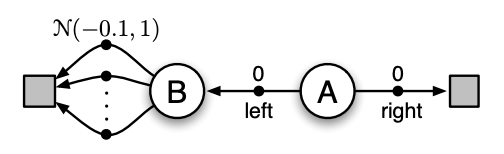

This MDP starts in the state A, there's two terminal states denoted by the grey squares. THere's a reward of 0 for transitioning left or right from A. However from B to the left terminal state, there are many actions all of which have a reward that's sampled from a normal distribution with a mean of -0.1 and variance of 1. 

So our maximisation bias, for algorithms like q-learning comes in to play here. As we explore this MDP, we notice that some of the transitions into the left terminal state will give us rewards greater than 0. Because of this, methods like q-learning will favour going left, even though it's sub-optimal, because it uses the max q-value. 

We use double learning to fix maximisation bias.

Double learning involves using two sets of Q values. Denoted as $Q_1(a)$ and $Q_2(a)$. 

- We use one estimate, e.g. $Q_1(a)$ to get our maximised action: $A^*=\argmax_aQ_1(a)$

- Then we use our other set of Q values to ge an estimate of that actions value:
$Q_2(A^*)=Q_2(\argmax_aQ_1(a))$

- This will be unbiased because $\mathbb{E}[Q_2(A^*)]=q(A^*)$. So our expected value of that maximised action should be the true action value of that action. 

- More practically, double learning works to reduce variance by reducing the chance of a propogated error caused by the noise. For example, in the example MDP, the chance that the same action over the two values will both be the same q value. So it won't be the only action picked, thus reducing variance. 

We repeat this process, swapping the Q-values around. This is the key idea of *double learning*. And we only update one set of q-values per step. 

This concept extends to our algorithms for learning Full MDPS. The Q-learning variant is called Double Q-learning. Here, the timesteps are divded into two. One way of dividing them is essentially "flip a coin", so draw from a distribution.

Our double Q-learning update looks like so:

$$
Q_1(S_t,A_t)\leftarrow Q_1(S_t,A_t)+\alpha [R_{t+1}+\gamma Q_2(S_{t+1},\argmax_a Q_1(S_{t+1},a))-Q_1(S_t,A_t)]
$$

Of course, as we sample our coin flip, the sets will be reversed. 

- The vehaviour policy may use both of the action-value estimates. E.g., an $\epsilon$ greedy policy may average the two estimates for picking it's new action.

Here we have the full algorithm:

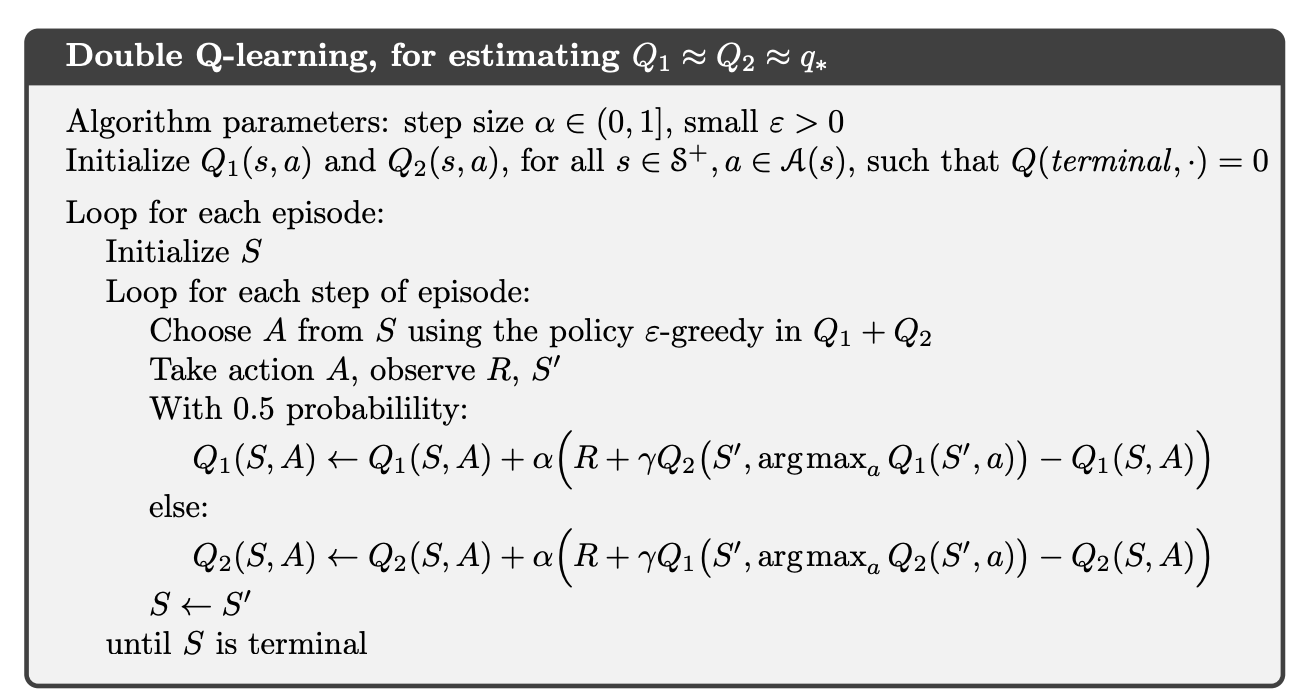

Exercise 6.13:

$$
Q_1(S_t,A_t)\leftarrow Q_1(S_t,A_t)+\alpha [R_{t+1}+\gamma \sum_{a}\pi(a|S_{t+1})Q_2(S_{t+1},a)-Q_1(S_t,A_t)]
$$

## 6.8 Games, Afterstates, and Other Special Cases

- Afterstates are pretty mcuh states where we know the subsequent state with certainty. 

- For example, tic-tac-toe our original state may have an X in the bottom left and we're O. Our current state would be that original state, and if we put our in the centre, then our next state will be the board with the O in the middle and X in the bottom left. This next state is an *afterstate* because we know for sure what that state will be with certainty.

- If we use a different examples, like the stochastic windy grid world, this isn't the case. Because if we take an action from a state, we can't say for certain what the next state would be because of the randmoness component. 

- The state-value for an after state is the *afterstate value function*.

- We can take advantage of afterstates to make more efficient learning methods. 

- The added efficiency comes from when multiple state-action pairs end up with the same afterstate, such as in this tic-tac-toe example:

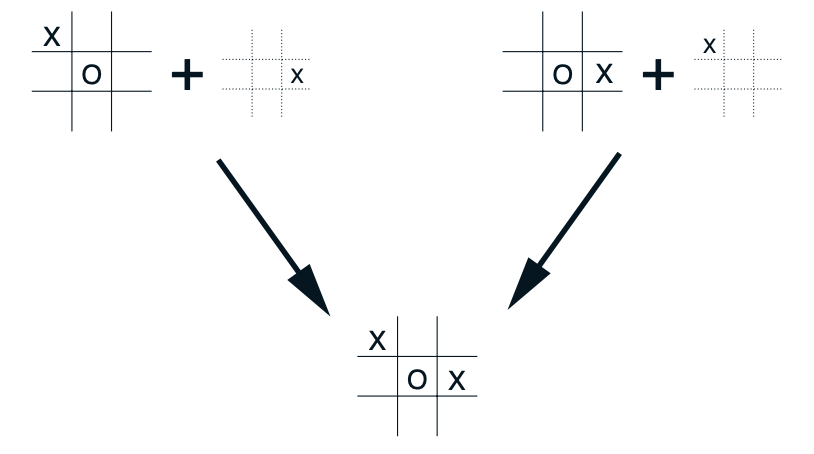

In this case, both action-values should have the same value. But conventially, this woudln't be the case. But using an afterstate value function would assess all actions that could lead up to that afterstate equally. 

There are many types of special cases like these. But the book this is based on would be impossibly long if it covered all of them. So it instead provides general principles.



Exercise 6.14:

In Jack's Car Rental, we know with certainty what our actions will do and our state will be the following day. Because of this, we can take advantage of hte act that many actions from many different states may lead to the same afterstate. For example if we had 5 cars at location 1 and 3 cars at location two, then move 2 cars from location 1 to location 2, we know the next say we'll have 3 cars at location one and 5 at location 2 the next day. But this would also be the case if we had 6 cars at location 1 and 1 at location two but we move 4 cars instead of 3. Both actions will lead to the same afterstate.

This should speed up convergence because it would help the learning method find that these two actions should have the same afterstate value.